In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import distinctipy as dpy

from sklearn.neighbors import NearestCentroid
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier

from tqdm import tqdm, trange

from sklearn.manifold import TSNE

In [92]:
df_test = pd.read_csv("./agren_40_long/emb_test.csv")
df_train = pd.read_csv("./agren_40_long/emb.csv")

labels = sorted(df_train['label'].unique())

df_train['label_n'] = df_train['label'].map(labels.index)
df_test['label_n'] = df_test['label'].map(labels.index)

df_train

,emb0,emb1,emb2,emb3,emb4,emb5,emb6,emb7,emb8,emb9,...,emb27,emb28,emb29,emb30,emb31,label,file_n,sample_n,file_name,label_n
0,0.138686,3.069807,1.542158,1.295073,0.907018,1.324624,0.632286,1.450702,0.957723,2.549576,...,1.423903,1.325420,1.407521,0.510142,1.120317,"uterus,_post-menopause_-_glandular_cells_2",0,2244,"uterus,_post-menopause_-_glandular_cells_2_500...",36
1,1.070675,3.590354,2.284757,2.583279,0.950602,0.794720,1.324524,1.563642,1.001907,2.213795,...,-0.163825,0.567659,0.834132,1.004493,0.227447,"uterus,_post-menopause_-_glandular_cells_2",0,2882,"uterus,_post-menopause_-_glandular_cells_2_500...",36
2,0.283454,2.525149,1.247949,1.391198,0.462270,0.606525,0.469389,1.265577,1.670902,2.005845,...,1.169277,0.754678,0.334557,0.100732,1.323504,"uterus,_post-menopause_-_glandular_cells_2",0,3235,"uterus,_post-menopause_-_glandular_cells_2_500...",36
3,0.719327,3.179170,1.281139,1.523295,-0.735141,0.793060,0.926855,1.745058,0.919043,0.879476,...,0.355603,1.317910,0.629239,1.107466,0.809533,"uterus,_post-menopause_-_glandular_cells_2",0,302,"uterus,_post-menopause_-_glandular_cells_2_500...",36
4,0.888076,2.127445,0.989625,1.801410,0.347884,1.345728,0.659293,1.494758,0.624848,1.229646,...,0.675908,1.153055,0.774898,1.135392,0.968297,"uterus,_post-menopause_-_glandular_cells_2",0,1921,"uterus,_post-menopause_-_glandular_cells_2_500...",36
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7995,1.341818,0.257027,0.477464,1.701287,1.089951,0.555109,1.260449,1.906112,1.031210,1.001475,...,-0.461765,1.771255,0.767158,0.171392,2.071747,"stomach,_lower_-_glandular_cells_2",159,2964,"stomach,_lower_-_glandular_cells_2_5000(0)",30
7996,1.775847,0.640359,1.262265,1.322934,2.549951,0.822300,1.171787,1.481304,2.303391,1.860392,...,0.173527,1.085366,0.839140,0.108721,3.178879,"stomach,_lower_-_glandular_cells_2",159,4852,"stomach,_lower_-_glandular_cells_2_5000(0)",30
7997,2.287643,-0.203672,1.550146,0.916388,2.262230,-0.089807,1.682748,1.351655,1.536744,1.383168,...,0.111493,1.347577,-0.146074,0.466364,2.334661,"stomach,_lower_-_glandular_cells_2",159,3755,"stomach,_lower_-_glandular_cells_2_5000(0)",30
7998,1.415888,0.171913,1.187900,1.212445,2.086049,0.962243,2.037936,2.000402,1.661970,1.476442,...,-0.164831,1.768335,0.544935,0.175333,0.954345,"stomach,_lower_-_glandular_cells_2",159,1432,"stomach,_lower_-_glandular_cells_2_5000(0)",30


In [93]:
df_test

,emb0,emb1,emb2,emb3,emb4,emb5,emb6,emb7,emb8,emb9,...,emb27,emb28,emb29,emb30,emb31,label,file_n,sample_n,file_name,label_n
0,1.061009,-0.174563,0.104381,0.431797,0.282395,2.645280,0.695970,0.243317,1.626019,0.056946,...,0.908935,1.004247,1.707453,0.123283,0.673030,kidney_-_cells_in_tubules_2,0,2244,kidney_-_cells_in_tubules_2_5000(5),14
1,1.106239,0.577435,0.612581,0.629101,0.480365,1.604263,1.444937,0.804340,1.881591,-0.653967,...,0.402453,1.632124,1.060373,-0.271456,0.268674,kidney_-_cells_in_tubules_2,0,2882,kidney_-_cells_in_tubules_2_5000(5),14
2,2.414913,0.879423,0.969680,-0.066362,0.045696,1.554669,1.653696,1.922382,0.664556,0.086276,...,-0.259377,1.060304,2.033987,0.240462,0.267875,kidney_-_cells_in_tubules_2,0,3235,kidney_-_cells_in_tubules_2_5000(5),14
3,1.622079,0.744768,0.847165,-0.006056,1.265815,2.466263,1.607932,1.073139,2.065143,0.090032,...,0.568496,1.274988,2.884253,0.655078,0.268438,kidney_-_cells_in_tubules_2,0,302,kidney_-_cells_in_tubules_2_5000(5),14
4,1.120115,0.616635,0.815279,0.451844,0.127616,2.549823,1.063480,0.930426,1.988365,-0.345890,...,0.437413,1.218830,1.719824,-0.113849,0.460103,kidney_-_cells_in_tubules_2,0,1921,kidney_-_cells_in_tubules_2_5000(5),14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8155,1.539090,0.920746,1.424955,-0.212817,0.386529,-0.641755,-0.302038,0.465871,0.234357,0.350828,...,-0.236939,0.892287,-0.107758,0.819276,0.697781,heart_muscle_-_myocytes_2,79,2812,heart_muscle_-_myocytes_2_5000(5),11
8156,1.140591,0.483836,1.747145,0.178871,0.334914,-0.278962,0.187602,0.595822,1.061071,0.621551,...,0.692566,0.769741,0.268581,0.781203,1.778831,heart_muscle_-_myocytes_2,79,4608,heart_muscle_-_myocytes_2_5000(5),11
8157,0.904558,0.918280,1.605633,0.332320,0.812285,0.441811,0.529746,0.994899,0.137483,0.690933,...,-0.098146,0.331711,0.564062,0.220777,1.073384,heart_muscle_-_myocytes_2,79,3320,heart_muscle_-_myocytes_2_5000(5),11
8158,1.609311,0.276465,1.495839,0.487846,1.227061,-0.028571,-0.084486,1.174455,0.569720,0.909874,...,-0.288892,0.688056,0.127981,1.069459,1.186588,heart_muscle_-_myocytes_2,79,634,heart_muscle_-_myocytes_2_5000(5),11


In [94]:
X_train = np.array(df_train.values[:,:32], dtype=float)
y_train = np.array(df_train['label_n'].values, dtype=int)

X_test = np.array(df_test.values[:,:32], dtype=float)
y_test = np.array(df_test['label_n'].values, dtype=int)

In [95]:
n = 40

In [96]:
def get_ns_pred():
    ns = NearestCentroid()
    ns.fit(X_train, y_train)

    return ns.predict(X_test)


In [97]:
def get_rfc_pred(max_depth=2):
    rfc = RandomForestClassifier(max_depth=max_depth)
    rfc.fit(X_train, y_train)

    return rfc.predict(X_test)

In [98]:
def get_mlpc_pred():
    mlpc = MLPClassifier()
    mlpc.fit(X_train, y_train)

    return mlpc.predict(X_test)

In [99]:
def get_ns_preds():
    return [get_ns_pred() for _ in trange(n)]

def get_rfc_preds(max_depth=2):
    return [get_rfc_pred(max_depth) for _ in trange(n)]

def get_mlpc_preds():
    return [get_mlpc_pred() for _ in trange(n)]

In [100]:
c_preds = {
    "NC"   : get_ns_preds(),
    "MLP" : get_mlpc_preds(),
    "RF-4"  : get_rfc_preds(4),
    "RF-2"  : get_rfc_preds(2),
}

100%|██████████| 40/40 [01:05<00:00,  1.65s/it]


In [103]:
acc_df = pd.read_csv("./agren_40_long/unused_accs.csv")
acc_df

,NC,MLP,RF-4,RF-2,label
0,0.677033,0.894737,0.722488,0.727273,adrenal_gland_-_glandular_cells_2
1,0.677033,0.889952,0.732057,0.732057,adrenal_gland_-_glandular_cells_2
2,0.677033,0.894737,0.739234,0.657895,adrenal_gland_-_glandular_cells_2
3,0.677033,0.885167,0.720096,0.629187,adrenal_gland_-_glandular_cells_2
4,0.677033,0.892344,0.715311,0.669856,adrenal_gland_-_glandular_cells_2
...,...,...,...,...,...
1515,0.612440,0.901914,0.339713,0.064593,"uterus,_pre-menopause_-_cells_in_endometrial_s..."
1516,0.612440,0.875598,0.291866,0.038278,"uterus,_pre-menopause_-_cells_in_endometrial_s..."
1517,0.612440,0.858852,0.263158,0.126794,"uterus,_pre-menopause_-_cells_in_endometrial_s..."
1518,0.612440,0.880383,0.318182,0.064593,"uterus,_pre-menopause_-_cells_in_endometrial_s..."


In [104]:

def acc(label, classifier):
    index = df_test['label'].values == label
    accs = [
        np.mean(y_test[index] == c_preds[classifier][i][index])
        for i in range(n)
    ]

    return np.mean(accs), np.std(accs)

c_acc_errs = {
    c : {
        label : acc(label, c)
        for label in labels
    }
    for c in c_preds
}


In [58]:
import colormaps as cmaps

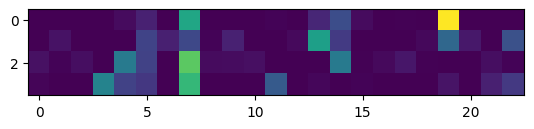

In [141]:
liver_df = pd.read_csv("./agren_40_long/nc_emb_Tl.csv")
#liver_df = liver_df.reindex(labels + ["label"])

high_score_columns = liver_df.columns[1:][liver_df[labels].max() > 0.01]

plt.imshow(liver_df[high_score_columns].values)

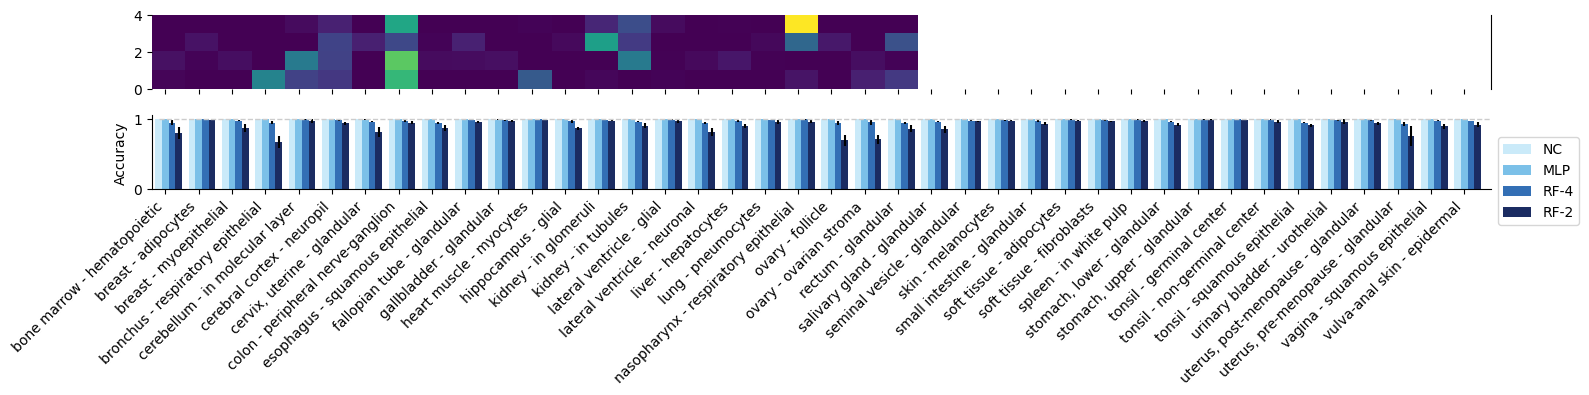

In [149]:
width = 0.2

x = np.arange(len(labels))

fig, (axl, axa) = plt.subplots(2, 1, figsize=(16, 4), sharex=True)

classifier_colors = cmaps.WhiteBlue.discrete(5).colors[1:]
    
for i,(label, acc_errs) in enumerate(c_acc_errs.items()):
    offset = i * width

    accs = [e[0] for e in acc_errs.values()]
    errs = [e[1] for e in acc_errs.values()]

    rects = axa.bar(x + offset, accs, width, yerr=errs, label=label, color=classifier_colors[i])

axa.plot([0, 40], [1,1], linestyle='--', color=[0.8,0.8,0.8], linewidth=1)
    

show_labels = [
    label.replace('_', ' ').replace(' 2', '').replace(' cells', '')
    for label in labels
]

axl.imshow(liver_df[high_score_columns].values, aspect='auto', extent=[-width, len(high_score_columns) - width, 0, 4])
axl.set_xlim([0, 9])
axl.spines[['bottom', 'top', 'right']].set_visible(False)
axl.tick_params(bottom='off')

axa.set_ylabel("Accuracy")
axa.set_xticks(x + width, show_labels, rotation=45, ha='right')
axa.spines[['top', 'right']].set_visible(False)
axa.legend(bbox_to_anchor=(1, 0.8, 0, 0))
axa.set_xlim([-width, 40])    

plt.subplots_adjust(bottom=0.5, top=0.8)
#axa.set_title("Cell Classification Accuracy on $D_{emb}=32$ embedding")
fig.tight_layout()
#fig.savefig("./images/agren_emb_class.png", dpi=600)